#Module 7.6
## Case Study
###Porównywanie odsetek kredytowych

In [8]:
import numpy as np
import numpy_financial as npf

In [9]:
freq = 12
rate = 0.0675
years = 30
pv = 200000

rate /= freq  # konwersja stopy do okresu miesięcznego
nper = years * freq  # liczba wszystkich okresów

In [10]:
periods = np.arange(1,nper+1,dtype=int)

In [39]:
print(periods[::25])

[  1  26  51  76 101 126 151 176 201 226 251 276 301 326 351]


In [41]:
interest_equal = - np.around(npf.ipmt(rate,periods,nper,pv),2)
interest_equal

array([1125.  , 1124.03, 1123.06, 1122.08, 1121.09, 1120.1 , 1119.11,
       1118.1 , 1117.1 , 1116.08, 1115.07, 1114.04, 1113.01, 1111.97,
       1110.93, 1109.88, 1108.83, 1107.77, 1106.71, 1105.63, 1104.56,
       1103.47, 1102.38, 1101.29, 1100.19, 1099.08, 1097.96, 1096.84,
       1095.72, 1094.58, 1093.44, 1092.3 , 1091.14, 1089.98, 1088.82,
       1087.65, 1086.47, 1085.28, 1084.09, 1082.89, 1081.69, 1080.47,
       1079.26, 1078.03, 1076.8 , 1075.56, 1074.31, 1073.06, 1071.8 ,
       1070.53, 1069.25, 1067.97, 1066.68, 1065.38, 1064.08, 1062.77,
       1061.45, 1060.12, 1058.79, 1057.45, 1056.1 , 1054.75, 1053.38,
       1052.01, 1050.63, 1049.24, 1047.85, 1046.45, 1045.04, 1043.62,
       1042.19, 1040.76, 1039.31, 1037.86, 1036.41, 1034.94, 1033.46,
       1031.98, 1030.49, 1028.99, 1027.48, 1025.96, 1024.44, 1022.9 ,
       1021.36, 1019.81, 1018.25, 1016.68, 1015.1 , 1013.51, 1011.92,
       1010.31, 1008.7 , 1007.08, 1005.44, 1003.8 , 1002.15, 1000.49,
        998.82,  997

In [13]:
np.set_printoptions(suppress=True)

principal_decreasing = np.around(np.zeros(nper)+(pv/nper),2)
principal_decreasing[:10]

array([555.56, 555.56, 555.56, 555.56, 555.56, 555.56, 555.56, 555.56,
       555.56, 555.56])

In [14]:
balance = np.zeros(nper) + pv
balance_close = np.around(balance - np.cumsum(principal_decreasing),2)
balance_close[[0,1,2,-3,-2,-1]]

array([199444.44, 198888.88, 198333.32,   1109.52,    553.96,     -1.6 ])

In [15]:
np.cumsum(principal_decreasing)[:10]

array([ 555.56, 1111.12, 1666.68, 2222.24, 2777.8 , 3333.36, 3888.92,
       4444.48, 5000.04, 5555.6 ])

In [26]:
balance_open = balance_close + principal_decreasing
print(balance_open[10:-10:10])

[194444.4 188888.8 183333.2 177777.6 172222.  166666.4 161110.8 155555.2
 149999.6 144444.  138888.4 133332.8 127777.2 122221.6 116666.  111110.4
 105554.8  99999.2  94443.6  88888.   83332.4  77776.8  72221.2  66665.6
  61110.   55554.4  49998.8  44443.2  38887.6  33332.   27776.4  22220.8
  16665.2  11109.6]


In [28]:
interest_decreasing = np.around(balance_open * rate,2)
interest_decreasing[:10]

array([1125.  , 1121.87, 1118.75, 1115.62, 1112.5 , 1109.37, 1106.25,
       1103.12, 1100.  , 1096.87])

In [29]:
print("Wartość odsetek do zapłaty w wariancie kredytu w równych ratach wynosi: " + str("{:.2f}".format(interest_equal.sum())))
print("Wartość odsetek do zapłaty w wariancie kredytu w ratach malejących wynosi: " + str("{:.2f}".format(interest_decreasing.sum())))

Wartość odsetek do zapłaty w wariancie kredytu w równych ratach wynosi: 266990.60
Wartość odsetek do zapłaty w wariancie kredytu w ratach malejących wynosi: 203060.81


Text(0, 0.5, 'Skumulowana wartość odsetek')

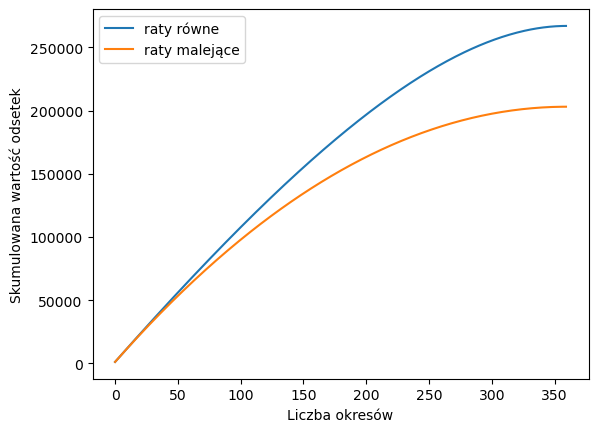

In [31]:
import matplotlib.pyplot as plt

plt.plot(interest_equal.cumsum(),label='raty równe')
plt.plot(interest_decreasing.cumsum(),label='raty malejące')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Skumulowana wartość odsetek')